# iris data from signate
## [data](https://signate.jp/competitions/115)

In [28]:
%matplotlib inline
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier

C:\Users\DC000580\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#load training data
train = pd.read_csv('data/115/train.tsv', delimiter='\t')
train.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,Iris-setosa
1,1,6.8,2.8,4.8,1.4,Iris-versicolor
2,3,6.1,3.0,4.9,1.8,Iris-virginica
3,4,6.4,3.2,5.3,2.3,Iris-virginica
4,5,6.3,3.3,4.7,1.6,Iris-versicolor


In [4]:
train.describe()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,72.773333,5.922667,3.097333,3.844000,1.220000
std,46.039223,0.877277,0.443565,1.852116,0.787572
min,0.000000,4.400000,2.000000,1.000000,0.100000
25%,33.000000,5.100000,2.800000,1.550000,0.200000
50%,72.000000,5.900000,3.000000,4.400000,1.400000
75%,114.000000,6.450000,3.350000,5.250000,1.800000
max,149.000000,7.900000,4.200000,6.900000,2.500000


In [5]:
#load test data
test = pd.read_csv('data/115/test.tsv', delimiter='\t')
test.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,2,6.1,2.8,4.7,1.2
1,7,6.3,2.5,4.9,1.5
2,8,6.2,3.4,5.4,2.3
3,10,6.7,3.1,4.7,1.5
4,13,5.0,3.4,1.6,0.4


In [6]:
test.describe()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,76.226667,5.764000,3.017333,3.672000,1.178667
std,40.924972,0.773486,0.427239,1.682064,0.740762
min,2.000000,4.300000,2.200000,1.100000,0.100000
25%,44.500000,5.100000,2.800000,1.600000,0.300000
50%,78.000000,5.700000,3.000000,4.300000,1.300000
75%,109.500000,6.350000,3.300000,5.050000,1.800000
max,147.000000,7.700000,4.400000,6.100000,2.500000


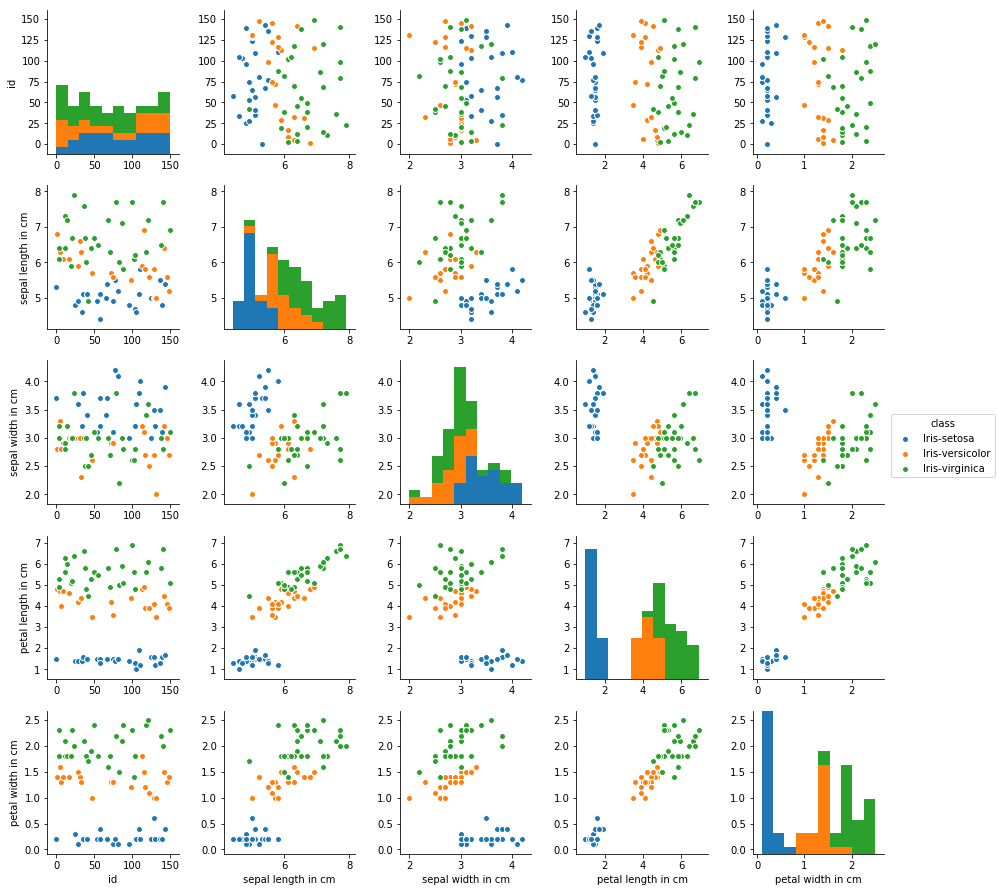

In [7]:
sns.pairplot(train, hue='class')

In [21]:
X_train = train.iloc[:, 1:5]
y_train = train['class']
X_test = test.iloc[:, 1:5]
X_test.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,6.1,2.8,4.7,1.2
1,6.3,2.5,4.9,1.5
2,6.2,3.4,5.4,2.3
3,6.7,3.1,4.7,1.5
4,5.0,3.4,1.6,0.4


In [22]:
#logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
print('coefficient = ', clf.coef_)
print('intercept = ', clf.intercept_)

coefficient =  [[ 0.34080336  1.22309842 -1.89235178 -0.86110204]
 [ 0.20041033 -1.00944447  0.24471356 -0.5166738 ]
 [-1.25107932 -1.32890064  2.03072307  1.71395957]]
intercept =  [ 0.22285914  0.5729105  -0.76881149]


In [24]:
#prediction
y_pred = clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 

In [25]:
#output file for submition
data = pd.concat([test, pd.DataFrame(y_pred)], axis=1)
data = data[['id', 0]]
data.to_csv('data/115/submit_logistic.csv', index=None, header=None, encoding='sjis')

In [26]:
#SVM
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicol

In [27]:
#output file for submition
data = pd.concat([test, pd.DataFrame(y_pred)], axis=1)
data = data[['id', 0]]
data.to_csv('data/115/submit_svm.csv', index=None, header=None, encoding='sjis')

In [29]:
#Random Forest
forest = RandomForestClassifier(min_samples_leaf=3, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicol

In [30]:
#output file for submition
data = pd.concat([test, pd.DataFrame(y_pred)], axis=1)
data = data[['id', 0]]
data.to_csv('data/115/submit_randomforest.csv', index=None, header=None, encoding='sjis')